In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("powerproduction.csv")

In [3]:
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [5]:
df.max()

speed     25.000
power    113.556
dtype: float64

In [6]:
df.min()

speed    0.0
power    0.0
dtype: float64

In [7]:
df.mean()

speed    12.590398
power    48.014584
dtype: float64

In [8]:
df.median()

speed    12.5505
power    41.6455
dtype: float64

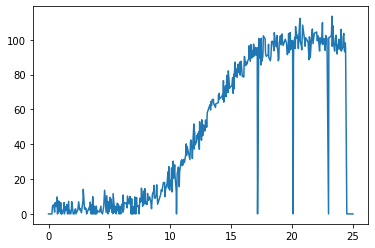

In [9]:
plt.plot(df['speed'], df['power'])

On inspection, there are datapoints with winds above 10, but no power production. This may be due to data entry error, recording error, or wind turbines facing perpendicular to the wind. For the sake of training a model, we will remove these points to clean up the dataset for training.

In [10]:
#Remove power of zero where windspeed is above 10
df = df.drop(df[(df.speed > 10) & (df.power == 0)].index)
df.tail()

,speed,power
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


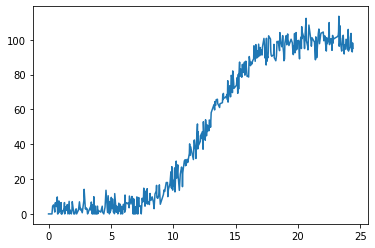

In [11]:
plt.plot(df['speed'], df['power'])

We'll split the set in preparation for training and testing, using an 80/20 split.

In [12]:
#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
train = df.sample(frac = 0.8)
train.sort_index()

,speed,power
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
6,0.400,5.186
7,0.450,3.826
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [13]:
train_list = (train.index.values) #https://stackoverflow.com/a/18360223
#train_list
test = df.drop(train_list)
test.sort_index()

,speed,power
0,0.000,0.000
1,0.125,0.000
5,0.325,4.331
9,0.526,5.553
24,1.026,0.000
...,...,...
450,22.673,100.698
462,23.298,96.337
476,23.824,97.334
477,23.849,100.322


In [14]:
#Train model
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [15]:
# Fit the data.
model.fit(train['speed'], train['power'], epochs=500, batch_size=10)

Epoch 1/500
39/39 [==============================] - 0s 644us/step - loss: 4206.5584
Epoch 2/500
39/39 [==============================] - 0s 640us/step - loss: 4143.0604
Epoch 3/500
39/39 [==============================] - 0s 729us/step - loss: 4591.3594
Epoch 4/500
39/39 [==============================] - 0s 767us/step - loss: 3728.7717
Epoch 5/500
39/39 [==============================] - 0s 656us/step - loss: 3786.0983
Epoch 6/500
39/39 [==============================] - 0s 647us/step - loss: 3495.7781
Epoch 7/500
39/39 [==============================] - 0s 730us/step - loss: 3261.6171
Epoch 8/500
39/39 [==============================] - 0s 762us/step - loss: 3000.9838
Epoch 9/500
39/39 [==============================] - 0s 608us/step - loss: 2723.8643
Epoch 10/500
39/39 [==============================] - 0s 601us/step - loss: 2510.3813
Epoch 11/500
39/39 [==============================] - 0s 745us/step - loss: 2535.9181
Epoch 12/500
39/39 [==============================] - 0s 631us/

39/39 [==============================] - 0s 545us/step - loss: 174.1431
Epoch 97/500
39/39 [==============================] - 0s 599us/step - loss: 156.1932
Epoch 98/500
39/39 [==============================] - 0s 560us/step - loss: 159.7094
Epoch 99/500
39/39 [==============================] - 0s 590us/step - loss: 145.1163
Epoch 100/500
39/39 [==============================] - 0s 608us/step - loss: 145.3509
Epoch 101/500
39/39 [==============================] - 0s 579us/step - loss: 138.8617
Epoch 102/500
39/39 [==============================] - 0s 621us/step - loss: 142.2332
Epoch 103/500
39/39 [==============================] - 0s 600us/step - loss: 124.9278
Epoch 104/500
39/39 [==============================] - 0s 628us/step - loss: 124.2243
Epoch 105/500
39/39 [==============================] - 0s 657us/step - loss: 127.9595
Epoch 106/500
39/39 [==============================] - 0s 565us/step - loss: 133.3841
Epoch 107/500
39/39 [==============================] - 0s 584us/step - 

39/39 [==============================] - 0s 619us/step - loss: 52.8541
Epoch 193/500
39/39 [==============================] - 0s 630us/step - loss: 57.5611
Epoch 194/500
39/39 [==============================] - 0s 565us/step - loss: 49.6344
Epoch 195/500
39/39 [==============================] - 0s 592us/step - loss: 46.5654
Epoch 196/500
39/39 [==============================] - 0s 565us/step - loss: 51.1752
Epoch 197/500
39/39 [==============================] - 0s 577us/step - loss: 52.3729
Epoch 198/500
39/39 [==============================] - 0s 589us/step - loss: 48.7453
Epoch 199/500
39/39 [==============================] - 0s 599us/step - loss: 46.9778
Epoch 200/500
39/39 [==============================] - 0s 561us/step - loss: 50.2670
Epoch 201/500
39/39 [==============================] - 0s 593us/step - loss: 52.9837
Epoch 202/500
39/39 [==============================] - 0s 674us/step - loss: 44.1100
Epoch 203/500
39/39 [==============================] - 0s 588us/step - loss: 50

39/39 [==============================] - 0s 613us/step - loss: 27.3569
Epoch 289/500
39/39 [==============================] - 0s 617us/step - loss: 29.2661
Epoch 290/500
39/39 [==============================] - 0s 621us/step - loss: 27.1328
Epoch 291/500
39/39 [==============================] - 0s 555us/step - loss: 26.3732
Epoch 292/500
39/39 [==============================] - 0s 592us/step - loss: 28.0377
Epoch 293/500
39/39 [==============================] - 0s 597us/step - loss: 27.5314
Epoch 294/500
39/39 [==============================] - 0s 592us/step - loss: 25.9173
Epoch 295/500
39/39 [==============================] - 0s 573us/step - loss: 24.0232
Epoch 296/500
39/39 [==============================] - 0s 606us/step - loss: 26.2390
Epoch 297/500
39/39 [==============================] - 0s 594us/step - loss: 26.3317
Epoch 298/500
39/39 [==============================] - 0s 625us/step - loss: 26.0991
Epoch 299/500
39/39 [==============================] - 0s 552us/step - loss: 27

39/39 [==============================] - 0s 613us/step - loss: 19.6268
Epoch 385/500
39/39 [==============================] - 0s 602us/step - loss: 19.7390
Epoch 386/500
39/39 [==============================] - 0s 564us/step - loss: 19.2882
Epoch 387/500
39/39 [==============================] - 0s 571us/step - loss: 18.0450
Epoch 388/500
39/39 [==============================] - 0s 562us/step - loss: 18.0927
Epoch 389/500
39/39 [==============================] - 0s 582us/step - loss: 20.1202
Epoch 390/500
39/39 [==============================] - 0s 625us/step - loss: 17.7339
Epoch 391/500
39/39 [==============================] - 0s 613us/step - loss: 20.7141
Epoch 392/500
39/39 [==============================] - 0s 571us/step - loss: 18.4782
Epoch 393/500
39/39 [==============================] - 0s 566us/step - loss: 19.3185
Epoch 394/500
39/39 [==============================] - 0s 587us/step - loss: 18.4820
Epoch 395/500
39/39 [==============================] - 0s 613us/step - loss: 18

39/39 [==============================] - 0s 591us/step - loss: 17.3799
Epoch 481/500
39/39 [==============================] - 0s 682us/step - loss: 17.4312
Epoch 482/500
39/39 [==============================] - 0s 573us/step - loss: 17.8317
Epoch 483/500
39/39 [==============================] - 0s 671us/step - loss: 17.7060
Epoch 484/500
39/39 [==============================] - 0s 772us/step - loss: 16.1681
Epoch 485/500
39/39 [==============================] - 0s 624us/step - loss: 17.6733
Epoch 486/500
39/39 [==============================] - 0s 636us/step - loss: 16.8123
Epoch 487/500
39/39 [==============================] - 0s 670us/step - loss: 16.2393
Epoch 488/500
39/39 [==============================] - 0s 642us/step - loss: 17.2937
Epoch 489/500
39/39 [==============================] - 0s 614us/step - loss: 17.2116
Epoch 490/500
39/39 [==============================] - 0s 670us/step - loss: 17.7643
Epoch 491/500
39/39 [==============================] - 0s 589us/step - loss: 16

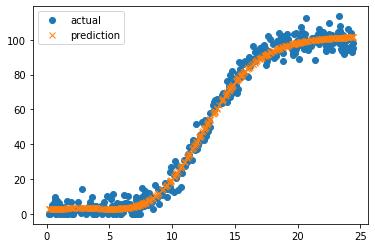

In [16]:
plt.plot(train['speed'], train['power'], 'o', label='actual')
plt.plot(train['speed'], model.predict(train['speed']), 'x', label='prediction')
plt.legend();

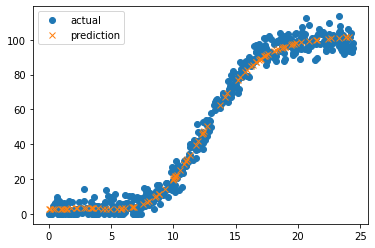

In [17]:
plt.plot(df['speed'], df['power'], 'o', label='actual')
plt.plot(test['speed'], model.predict(test['speed']), 'x', label='prediction')
plt.legend();

In [18]:
# Evaluate the neural network on the test data.
model.evaluate(test['speed'], test['power'])

4/4 [==============================] - 0s 2ms/step - loss: 18.7166


18.716598510742188

In [19]:
model.predict([25.5])

array([[101.78101]], dtype=float32)